<a href="https://colab.research.google.com/github/pr0fez/AI24-Programmering/blob/master/Exercises/08-file-handling.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# file handling exercises

---
These are introductory exercises in Python with focus in **file handling**.

All files needed for these exercises can be found in the **files** folder in this repo. Clone the repo to access them.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable and function names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice rolls (*)
Create a textfile called **dice_rolls.txt** using Python. Also for each subtask, write adequate headers. 

&nbsp; a) &nbsp; Simulate 20 dice rolls and write them to your textfile. (*)

&nbsp; b) &nbsp; Sort the dice rolls from a) and write them to a separate row in the same textfile. (*)

&nbsp; c) &nbsp; Count the number of fours in the dice rolls and write them to a separate row in the same textfile. (*)

<details>

<summary>Answer </summary>

For example: 

```

Simulate 20 dice rolls:
[3 4 4 3 1 2 6 6 4 6 2 4 5 3 1 2 1 3 3 1]

Sorted dice rolls:
[1 1 1 1 2 2 2 3 3 3 3 3 4 4 4 4 5 6 6 6]

Number of fours: 4

```

</details>

In [2]:
import random as rnd
from pathlib import Path

rolls = [rnd.randint(1, 6) for _ in range(20)]
sorted_rolls = sorted(rolls)
count_four = rolls.count(4)

dice_rolls = Path("dice_rolls.txt")
with dice_rolls.open("w", encoding="utf-8", newline="\n") as f:
    f.write("Simulate 20 dice rolls:\n")
    f.write(f"{rolls}\n\n")

    f.write("Sorted dice rolls:\n")
    f.write(f"{sorted_rolls}\n\n")

    f.write("Number of fours:\n")
    f.write(f"{count_four}\n")

---
## 2. Test results (*)
Read in the file test_result.txt (located in the data folder of this repo) in Python.

[test_result]: https://github.com/pr0fez/Programmering-med-Python-21/blob/master/Files/test_result.txt

&nbsp; a) &nbsp; Print out the text in the terminal (*)

&nbsp; b) &nbsp; Create new rows in the same file and write the people and their corresponding scores in alphabetical order. (*)

&nbsp; c) &nbsp; Create additional rows in the same file and sort the people after their grades. The grade limits are: (**)

- F < 20
- E: 20-29
- D: 30-39
- C: 40-49
- B: 50-59
- A: 60-70

<details>

<summary>Hint </summary>

Open the file using option "r" for read and open the file using option "a" for append. 

</details>
<br>
<details>

<summary>Answer </summary>

```

Adam Gustafsson 25
Emil Johansson 23
Sven Erik Karlsson 13
Ove Karlsten 41
Emma Boden 32
Ida Håkansson 23
Ella Ester 41
Hanna Karlsson 23 
Johan Johansson 42
Sven Erik Lundin 39
Björn Björnsson 39
Karl Karlsson 32
Bose Bosseson 32
Håkan Håkanson 24
Jonas Jonasson 31
Erik Eriksson 31
Gore Bord 55
Jakob Kallander 65
Fredrika Ulven 10

Sorted alphabetically
Adam Gustafsson 25
Björn Björnsson 39
Bose Bosseson 32
Ella Ester 41
Emil Johansson 23
Emma Boden 32
Erik Eriksson 31
Fredrika Ulven 10
Gore Bord 55
Hanna Karlsson 23
Håkan Håkanson 24
Ida Håkansson 23
Jakob Kallander 65
Johan Johansson 42
Jonas Jonasson 31
Karl Karlsson 32
Ove Karlsten 41
Sven Erik Karlsson 13
Sven Erik Lundin 39

Sorted results: 
Grade: F
Fredrika Ulven 10
Sven Erik Karlsson 13
Grade: E
Adam Gustafsson 25
Emil Johansson 23
Hanna Karlsson 23
Håkan Håkanson 24
Ida Håkansson 23
Grade: D
Björn Björnsson 39
Bose Bosseson 32
Emma Boden 32
Erik Eriksson 31
Jonas Jonasson 31
Karl Karlsson 32
Sven Erik Lundin 39
Grade: C
Ella Ester 41
Johan Johansson 42
Ove Karlsten 41
Grade: B
Gore Bord 55
Grade: A
Jakob Kallander 65

```

</details>

In [ ]:
# a)
with open ("test_result.txt", "r", encoding="utf-8") as f:
    lines = f.read()
print("Original file content:")
print(lines)

Original file content:
Adam Gustafsson 25
Emil Johansson 23
Sven Erik Karlsson 13
Ove Karlsten 41
Emma Boden 32
Ida Håkansson 23
Ella Ester 41
Hanna Karlsson 23 
Johan Johansson 42
Sven Erik Lundin 39
Björn Björnsson 39
Karl Karlsson 32
Bose Bosseson 32
Håkan Håkanson 24
Jonas Jonasson 31
Erik Eriksson 31
Gore Bord 55
Jakob Kallander 65
Fredrika Ulven 10
Alphabetical order:
Fredrika Ulven 10



In [45]:
# b) 
results = []
with open("test_result.txt", "r") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue

        name, score = line.rsplit(maxsplit=1)
        results.append((name, int(score)))

results.sort(key=lambda x: x[0])

with open("test_result.txt", "a") as f:
    f.write("\n")
    f.write("\nAlphabetical order:\n")
    for name, score in results:
        f.write(f"{name} {score}\n")

In [46]:
# c)
def get_grade(score):
    if score < 20:
        return "f"
    elif score < 30:
        return "E"
    elif score < 40:
        return "D"
    elif score < 50:
        return "C"
    elif score < 60:
        return "B"
    else:
        return "A"
    
graded_results = [(name, score, get_grade(score)) for name, score in results]

graded_results.sort(key=lambda x: x[2])

with open("test_result.txt", "a") as f:
    f.write("\nSorted by grades:\n")
    for name, score, grade in graded_results:
        f.write(f"{name} {score} ({grade})\n")


---
## 3. National test (*)
Read in the file NPvt19Ma2A.txt and NPvt19Ma2C.txt (located in the data folder of this repo) in Python. Use **matplotlib** to plot pie charts for each grade categories in each file. (*)

[files]: https://github.com/pr0fez/Programmering-med-Python-21/tree/master/Files

<details>

<summary>Hint </summary>

Use **subplot** in **matplotlib**

</details>
<br>
<details>

<summary>Answer </summary>

<img align="left" src="../assets/NP.png" width="300"/>

</details>

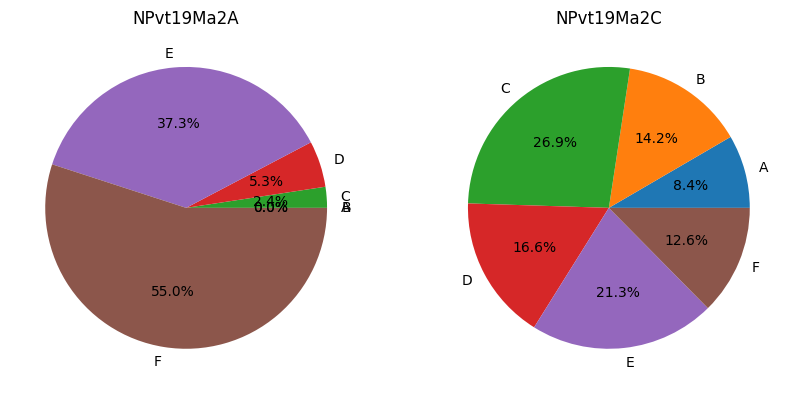

In [50]:
import matplotlib.pyplot as plt

def read_data(filename):
    grades ={}
    with open(filename, "r") as f:
        for line in f:
            grade, percent = line.split()
            grades[grade] = float(percent.replace("%", ""))
    return grades

data_a = read_data("NPvt19Ma2A.txt")
data_c = read_data("NPvt19Ma2C.txt")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(
    list(data_a.values()), 
    labels=list(data_a.keys()), 
    autopct="%.1f%%"
)
axes[0].set_title("NPvt19Ma2A")

axes[1].pie(
    list(data_c.values()), 
    labels=list(data_c.keys()), 
    autopct="%.1f%%"
)
axes[1].set_title("NPvt19Ma2C")

plt.show()


---
## 4. Dice roll experiment (**)
Simulate 10, 100, 1000, 10000, 100000 dice rolls and count the freqencies and probabilities for each number in each simulation. Create a new text file using Python with the name "simulation.txt" and write the results to that text file.(**)

[files]: https://github.com/pr0fez/Programmering-med-Python-21/tree/master/Files

<details>

<summary>Answer </summary>

```

Number of rolls: 10 
Ones: 4, probability: 0.4
Twos: 1, probability: 0.1
Threes: 1, probability: 0.1
Fours: 2, probability: 0.2
Fives: 1, probability: 0.1
Sixes: 1, probability: 0.1

Number of rolls: 100 
Ones: 16, probability: 0.16
Twos: 12, probability: 0.12
Threes: 24, probability: 0.24
Fours: 18, probability: 0.18
Fives: 16, probability: 0.16
Sixes: 14, probability: 0.14

Number of rolls: 1000 
Ones: 181, probability: 0.181
Twos: 167, probability: 0.167
Threes: 184, probability: 0.184
Fours: 152, probability: 0.152
Fives: 168, probability: 0.168
Sixes: 148, probability: 0.148

Number of rolls: 10000 
Ones: 1630, probability: 0.163
Twos: 1666, probability: 0.1666
Threes: 1686, probability: 0.1686
Fours: 1616, probability: 0.1616
Fives: 1677, probability: 0.1677
Sixes: 1725, probability: 0.1725

Number of rolls: 100000 
Ones: 16804, probability: 0.16804
Twos: 16625, probability: 0.16625
Threes: 16646, probability: 0.16646
Fours: 16660, probability: 0.1666
Fives: 16576, probability: 0.16576
Sixes: 16689, probability: 0.16689

```

In [53]:
import random 
from collections import Counter
from pathlib import Path

def simulate_dice(n_rolls: int) -> dict:
    """Simulate n_rolls time a fair 6-side die and return count for 1..6"""
    rolls = [random.randint(1, 6) for _ in range(n_rolls)]
    counts = Counter(rolls)
    return {face: counts.get(face, 0) for face in range(1, 7)}

def probs_from_counts(counts: dict, total: int) -> dict:
    """turn count into probabilities"""
    return {face: counts[face] / total for face in range(1, 7)}

scenarios = [10, 1_000, 10_000, 100_000]

out_path = Path("simulation.txt")
with out_path.open("w") as f:
    for n in scenarios:
        counts = simulate_dice(n)
        probs = probs_from_counts(counts, n)

        f.write(f"Number of rolls: {n}\n")
        for face in range(1, 7):
            f.write(f"{face}s: count={counts[face]:>6}  probability={probs[face]:.4f}\n")
            f.write("-" * 40 + "\n")
           


---

pr0fez Giang

[LinkedIn][linkedIn_pr0fez]

[GitHub portfolio][github_portfolio]

[linkedIn_pr0fez]: https://www.linkedin.com/in/pr0fezgiang/
[github_portfolio]: https://github.com/pr0fez/Portfolio-pr0fez-Giang

---